In [50]:
import pandas as pd
import tweepy
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns

## Data Gathering

### Image Prediction data gathering

In [51]:
image_URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
req = requests.get(image_URL)
url_content = req.content
with open('imagePredict.tsv', 'wb') as file:
    file.write(url_content)
df_image = pd.read_csv('./imagePredict.tsv', sep='\t')
df_image.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


### WeRateDogs Twitter Archive gathering

In [52]:
df_arc = pd.read_csv('./twitter-archive-enhanced.csv')
df_arc.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Tweet_json gathering

In [53]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [54]:
# loads json file
data = []
with open('./tweet_json.txt') as f:
    for line in f:
        data.append(json.loads(line))
df_tweet = pd.DataFrame(data)
df_tweet = df_tweet[['id', 'retweet_count', 'favorite_count']]
len(df_tweet)
df_tweet.head()
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Data Assessing

In [55]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- There are 2356 entries and for some Columns, we have some Null(NaN) data. This needs to be looked later.
- Some columns (expanded_urls, source etc) seem unnecessary

In [56]:
df_arc.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1527,690360449368465409,NaN,NaN,2016-01-22 02:28:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Stop sending in lobsters. This is the final wa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690360449...,9,10,the,None,None,None,None
2153,669661792646373376,NaN,NaN,2015-11-25 23:39:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a brave dog. Excellent free climber. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669661792...,5,10,a,None,None,None,None
2014,672222792075620352,NaN,NaN,2015-12-03 01:16:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cal. He's a Swedish Geriatric Cheddar....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672222792...,9,10,Cal,None,None,None,None
1773,678255464182861824,NaN,NaN,2015-12-19 16:47:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jessifer. She is a Bismoth Teriyaki. F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678255464...,9,10,Jessifer,None,None,None,None
2134,670069087419133954,NaN,NaN,2015-11-27 02:38:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Randall. He's from Chernobyl. Built pl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670069087...,5,10,Randall,None,None,None,None


- Columne names 'doggo', 'floofer', 'pupper', 'puppo' can be melted into one single column called 'stages'

In [57]:
df_arc.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [58]:
df_arc.sample(10)
df_arc['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Leonard      1
Edgar        1
Gilbert      1
Pepper       1
Zuzu         1
Name: name, Length: 957, dtype: int64

- Names like 'None', 'a', need to be adjusted since apparantly they are not extracted correctly

Data Quality
- Drop the rows that are 'retweet' or 'in_reply' tweets. We only need the original rating tweet.
- Drop Unnecessary columns and keep only the necessary ones
- Change Data type of 'timestamp' column from 'object' to 'Datetime'
- Fix the wrong 'rating_numerator' values
- Fix the wrong 'rating_denominator' values
- Fix the Wrong data in 'name' columne - Strange names like 'a', 'None', 'Not'
- Change data type of ['retweet_count','favorite_count','img_num'] to Int64
- Replace str type "None" with "Nan"

Data Tidiness
- Column headers should NOT be values, but variable names. Melt ['doggo', 'floofer', 'pupper', 'puppo']
- 'Image Prediction', 'WeRateDogs Archive', and 'tweet-json' dataframes need to be merged in one dataframe(table)

## Data Cleaning

### Data Tidiness First

**Define & Code**
#### Column headers should NOT be values, but variable names. Melt ['doggo', 'floofer', 'pupper', 'puppo']

In [59]:
# Create new column names 'stage' and incorporate all the dog types
df_arc[['doggo', 'floofer', 'pupper', 'puppo']] = df_arc[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', '')
df_arc['stage'] = (df_arc['doggo'] + df_arc['floofer'] + df_arc['pupper'] + df_arc['puppo']).str.strip()
df_arc['stage'] = df_arc['stage'].replace('doggofloofer', 'doggo/floofer')
df_arc['stage'] = df_arc['stage'].replace('doggopupper', 'doggo/pupper')
df_arc['stage'] = df_arc['stage'].replace('doggopuppo', 'doggo/puppo')
df_arc['stage'] = df_arc['stage'].replace('flooferpupper', 'floofer/pupper')
df_arc['stage'] = df_arc['stage'].replace('flooferpuppo', 'floofer/puppo')
df_arc['stage'] = df_arc['stage'].replace('pupperpoppo', 'pupper/puppo')

# Replace '' wwith 'NaN'
df_arc['stage'] = df_arc['stage'].replace('', np.nan)

# Delete 4 dog stages columns
df_arc.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)



**Test**

In [60]:
# Test
df_arc[df_arc['tweet_id']==854010172552949760]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo/floofer


**Define & Code**
#### 'Image Prediction', 'WeRateDogs Archive', and 'tweet-json' dataframes need to be merged in one dataframe(table)

In [61]:
len(df_arc), len(df_image), len(df_tweet)

(2356, 2075, 2354)

In [62]:
# Change columne names from 'tweet_id' to 'id'
df_arc.rename(columns={'tweet_id':'id'}, inplace=True)
df_image.rename(columns={'tweet_id':'id'}, inplace=True)

In [63]:
# Mege all three tables into one dataframe
df_total = pd.merge(df_arc, df_tweet, how='left', on='id')
df_total = pd.merge(df_total, df_image, how='left', on='id')

**Test**

In [64]:
# Test
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  stage                       380 n

### Data Quality

**Define & Code**
#### Drop the rows that are 'retweet' or 'in_reply' tweets. We only need the original rating tweet.

In [65]:
# Find the rows that meet the following conditions(Not in-reply and Not retweet)
cond1 = df_total['in_reply_to_status_id'].isnull()
cond2 = df_total['retweeted_status_id'].isnull()
df_total = df_total[cond1&cond2].copy()

**Test**

In [66]:
# Test
df_total['in_reply_to_status_id'].notnull().sum(), df_total['retweeted_status_id'].notnull().sum()

(0, 0)

**Define & Code**
#### Drop Unnecessary columns

In [67]:
df_total.columns

Index(['id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'retweet_count',
       'favorite_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [68]:
df_total = df_total[['id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator', 'name','stage','retweet_count','favorite_count','img_num','p1','p1_conf']]

**Test**

In [69]:
# test
df_total.head()

,id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,img_num,p1,p1_conf
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8853.0,39467.0,1.0,orange,0.097049
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,6514.0,33819.0,1.0,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,4328.0,25461.0,1.0,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,8964.0,42908.0,1.0,paper_towel,0.170278
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,9774.0,41048.0,2.0,basset,0.555712


**Define & Code**
#### Fix the wrong 'rating_numerator' values

In [70]:
df_total['rating_numerator'].value_counts()
# numerator of [0,1,2,3] are very unlikely. We should further look into it.

12      486
10      436
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
26        1
44        1
165       1
24        1
60        1
50        1
144       1
80        1
84        1
88        1
121       1
204       1
420       1
1776      1
27        1
45        1
75        1
99        1
0         1
Name: rating_numerator, dtype: int64

In [71]:
df_total.query('rating_numerator in [0,1,2,3]')

,id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,img_num,p1,p1_conf
315,835152434251116546,2017-02-24 15:40:31 +0000,When you're so blinded by your systematic plag...,0,10,None,NaN,3443.0,24574.0,3.0,swing,0.967066
765,777885040357281792,2016-09-19 15:00:20 +0000,This is Wesley. He's clearly trespassing. Seem...,3,10,Wesley,NaN,1893.0,7078.0,1.0,Afghan_hound,0.123529
1189,718246886998687744,2016-04-08 01:19:36 +0000,This is Alexanderson. He's got a weird ass bir...,3,10,Alexanderson,NaN,565.0,2115.0,1.0,Chihuahua,0.354488
1249,711306686208872448,2016-03-19 21:41:44 +0000,What hooligan sent in pictures w/out a dog in ...,3,10,None,NaN,819.0,3596.0,1.0,leatherback_turtle,0.280835
1314,706901761596989440,2016-03-07 17:58:08 +0000,This is Elliot. He's blocking the roadway. Dow...,3,10,Elliot,NaN,680.0,2264.0,1.0,wild_boar,0.859499
1406,699088579889332224,2016-02-15 04:31:20 +0000,This is Charl. He's a bully. Chucks that dumbb...,3,10,Charl,NaN,715.0,2451.0,1.0,mousetrap,0.456186
1478,693590843962331137,2016-01-31 00:25:18 +0000,Meet Phil. He's big af. Currently destroying t...,3,10,Phil,pupper,2233.0,5565.0,1.0,dining_table,0.383448
1601,686003207160610816,2016-01-10 01:54:44 +0000,This is Hammond. He's a peculiar pup. Loves lo...,3,10,Hammond,NaN,735.0,2009.0,1.0,damselfly,0.190786
1692,681302363064414209,2015-12-28 02:35:15 +0000,This is Chuck. He's a neat dog. Very flexible....,3,10,Chuck,NaN,2072.0,4347.0,1.0,frilled_lizard,0.326259
1761,678675843183484930,2015-12-20 20:38:24 +0000,Exotic pup here. Tail long af. Throat looks sw...,2,10,None,NaN,1680.0,3155.0,1.0,maze,0.339850


In [72]:
# it can be found that row with index='1714' are wronly recorded. It should be 11.26/10
# We can use Regular Expression to correctly extract the data

# Extract numerator and denominator (including decimal pts) from 'text' column
ratings = df_total['text'].str.extract('((?:\d+\.)?\d+)\/(\d+(\.\d+)?)', expand=True)

# Only numerator values have decimal pts
ratings[0].value_counts(), ratings[1].value_counts()

(12       486
 10       436
 11       413
 13       287
 9        153
 8         98
 7         52
 14        38
 5         33
 6         32
 3         19
 4         16
 2          9
 1          5
 80         1
 1776       1
 13.5       1
 84         1
 60         1
 11.27      1
 11.26      1
 420        1
 99         1
 0          1
 144        1
 50         1
 121        1
 44         1
 204        1
 165        1
 9.75       1
 88         1
 24         1
 45         1
 Name: 0, dtype: int64,
 10     2080
 50        3
 80        2
 11        2
 90        1
 170       1
 70        1
 2         1
 110       1
 120       1
 40        1
 7         1
 20        1
 150       1
 Name: 1, dtype: int64)

In [73]:
# Change datatypes from 'string' to 'float' beforehand
ratings[0] = ratings[0].astype('float64')

# Replace numerator and denominator values into newly extracted values
df_total['rating_numerator'] = ratings[0]

**Test**

In [74]:
df_total['rating_numerator'].value_counts()

12.00      486
10.00      436
11.00      413
13.00      287
9.00       153
8.00        98
7.00        52
14.00       38
5.00        33
6.00        32
3.00        19
4.00        16
2.00         9
1.00         5
13.50        1
0.00         1
24.00        1
84.00        1
420.00       1
1776.00      1
80.00        1
60.00        1
44.00        1
144.00       1
88.00        1
11.26        1
11.27        1
121.00       1
9.75         1
99.00        1
204.00       1
45.00        1
165.00       1
50.00        1
Name: rating_numerator, dtype: int64

In [75]:
# Even numerator values with decimal pts are correctly extracted
df_total[df_total['rating_numerator']==11.26]

,id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,img_num,p1,p1_conf
1712,680494726643068929,2015-12-25 21:06:00 +0000,Here we have uncovered an entire battalion of ...,11.26,10,None,NaN,542.0,1879.0,1.0,kuvasz,0.438627


**Define & Code**
#### Fix the wrong 'rating_denominator' values (should not be below 10)

In [76]:
df_total['rating_denominator'].value_counts()
# denominator of 2, 7, 20, 40 are very unlikely values. We should further look at these data

10     2080
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [77]:
df_total.query('rating_denominator in [2,7,20,40]')

,id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,img_num,p1,p1_conf
516,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24.0,7,Sam,NaN,1655.0,5927.0,1.0,golden_retriever,0.871342
1165,722974582966214656,2016-04-21 02:25:47 +0000,Happy 4/20 from the squad! 13/10 for all https...,4.0,20,None,NaN,1764.0,4493.0,1.0,Great_Dane,0.246762
1433,697463031882764288,2016-02-10 16:51:59 +0000,Happy Wednesday here's a bucket of pups. 44/40...,44.0,40,None,NaN,1552.0,3748.0,1.0,Labrador_retriever,0.999885
2335,666287406224695296,2015-11-16 16:11:11 +0000,This is an Albanian 3 1/2 legged Episcopalian...,1.0,2,an,NaN,71.0,152.0,1.0,Maltese_dog,0.857531


In [78]:
df_total.query('rating_denominator in [2,7,20,40]')
# it can be seen that values of 2, 7, and 20 are wronglg recorded. It extracted the 'date' instead of 'denominator'.
# Thus we manullay change the 'rating_denominator' for this case

# 2: should be 10
df_total.loc[2335, 'rating_denominator'] = int(10)
# 7: rating does not exist
df_total.loc[516, 'rating_denominator'] = np.nan
# 20 should be 10
df_total.loc[1165, 'rating_denominator'] = int(10)

# due to NaN value, we convert the datatype from 'float64' to 'Int64'
df_total['rating_denominator'] = df_total['rating_denominator'].astype('Int64')

**Test**

In [79]:
# Test
df_total.loc[2335, 'rating_denominator'], df_total.loc[516, 'rating_denominator'], df_total.loc[1165, 'rating_denominator']

(10, <NA>, 10)

**Define & Code**
#### Change Data type of 'timestamp' column from 'object' to 'Datetime'

In [80]:
# First, delete the last 5 characters(+0000), which are unnecessary
df_total['timestamp'] = df_total['timestamp'].str[:-5].str.strip().astype('datetime64')

**Test**

In [81]:
# Test
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   text                2097 non-null   object        
 3   rating_numerator    2097 non-null   float64       
 4   rating_denominator  2096 non-null   Int64         
 5   name                2097 non-null   object        
 6   stage               336 non-null    object        
 7   retweet_count       2097 non-null   float64       
 8   favorite_count      2097 non-null   float64       
 9   img_num             1971 non-null   float64       
 10  p1                  1971 non-null   object        
 11  p1_conf             1971 non-null   float64       
dtypes: Int64(1), datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 295.0+ KB


**Define & Code**
#### Fix the Wrong data in 'name' columne - Strange names like ['a', 'None', 'Not', 'actually', 'all']

In [82]:
df_total['name'].value_counts()[:40]
# strange names like [a, None, Not, actually, all, the, an, very etc.... ] can be found. These need changes
# Pattern found here that, all invalid names are written in lower cases.

None       603
a           55
Charlie     11
Lucy        11
Cooper      10
Oliver      10
Tucker       9
Penny        9
the          8
Sadie        8
Winston      8
Lola         8
Daisy        7
Toby         7
Koda         6
Bo           6
Bella        6
Jax          6
an           6
Oscar        6
Bailey       6
Stanley      6
Rusty        5
Dave         5
Chester      5
Louis        5
Leo          5
Buddy        5
Bentley      5
Scout        5
Milo         5
Alfie        4
one          4
very         4
Oakley       4
Winnie       4
Chip         4
Sophie       4
Jeffrey      4
Sammy        4
Name: name, dtype: int64

In [83]:
# Sort the rows with lower-cased names and replace the values with 'NaN'
print(df_total[df_total['name'].str.islower()]['name'].value_counts())
def validName(name):
    if name.islower():
        return ''
    else:
        return name
df_total['name'] = df_total['name'].apply(lambda x: validName(x))

a               55
the              8
an               6
one              4
very             4
quite            3
just             3
actually         2
not              2
getting          2
my               1
mad              1
life             1
incredibly       1
all              1
infuriating      1
his              1
old              1
this             1
such             1
unacceptable     1
by               1
light            1
officially       1
space            1
Name: name, dtype: int64


In [84]:
# df_name = df_total.query('name in ["a", "None", "not", "actually", "all"]')
# def getName(text):
#     name = text.split('named ')
#     if len(name)==2:
#         return name[1].split(' ')[0].replace('.', '')
#     else:
#         return 'None'
# df_name['name'] = df_name.apply(lambda x: getName(x['text']), axis=1)

# # create 'correct_name_dict' to change the values of wrong 'name' in original df(df_total)
# correct_name_dict = dict()
# for idx,row in df_name.iterrows():
#     correct_name_dict[row['id']] = row['name']
# # Reflect the change in original df (df_total)
# for idx,row in df_total.iterrows():
#     if row['id'] in correct_name_dict:
#         df_total.loc[idx, 'name'] = correct_name_dict[row['id']]

**Test**

In [85]:
#if there is any 'lower-cased' names
df_total[df_total['name'].str.islower()]['name'].value_counts()

Series([], Name: name, dtype: int64)

**Define & Code**
#### Change the data type of 'retweet_count'	,'favorite_count',	,img_num'	to int

In [86]:
df_total['retweet_count'] = df_total['retweet_count'].astype('Int64')
df_total['favorite_count'] = df_total['favorite_count'].astype('Int64')
df_total['img_num'] = df_total['img_num'].astype('Int64')

**Test**

In [87]:
# Test
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   text                2097 non-null   object        
 3   rating_numerator    2097 non-null   float64       
 4   rating_denominator  2096 non-null   Int64         
 5   name                2097 non-null   object        
 6   stage               336 non-null    object        
 7   retweet_count       2097 non-null   Int64         
 8   favorite_count      2097 non-null   Int64         
 9   img_num             1971 non-null   Int64         
 10  p1                  1971 non-null   object        
 11  p1_conf             1971 non-null   float64       
dtypes: Int64(4), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 301.2+ KB


**Define & Code**
#### Replace "None" with "Nan"

In [88]:
df_total = df_total.replace('None', np.nan)

**Test**

In [89]:
# Test
df_total.sample(10)

,id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,img_num,p1,p1_conf
2246,667878741721415682,2015-11-21 01:34:35,This is Tedrick. He lives on the edge. Needs s...,2.0,10,Tedrick,NaN,127,409,1,seat_belt,0.200373
1034,745057283344719872,2016-06-21 00:54:33,This is Oliver. He's downright gorgeous as hel...,12.0,10,Oliver,NaN,2585,7945,2,Shetland_sheepdog,0.963985
1923,674082852460433408,2015-12-08 04:27:30,This is a Sagitariot Baklava mix. Loves her ne...,11.0,10,,NaN,186,804,1,Pomeranian,0.666957
169,859196978902773760,2017-05-02 00:04:57,We only rate dogs. This is quite clearly a smo...,12.0,10,,NaN,25661,75193,1,Angora,0.224218
1365,702684942141153280,2016-02-25 02:42:00,This is Lucy. She's sick of these bullshit gen...,11.0,10,Lucy,NaN,1215,3516,1,golden_retriever,0.514085
1764,678424312106393600,2015-12-20 03:58:55,This is Crystal. She's a shitty fireman. No se...,2.0,10,Crystal,NaN,2880,5916,1,Maltese_dog,0.759945
2239,667937095915278337,2015-11-21 05:26:27,This dog resembles a baked potato. Bed looks u...,3.0,10,NaN,NaN,866,1356,1,hamster,0.172078
1949,673689733134946305,2015-12-07 02:25:23,When you're having a blast and remember tomorr...,11.0,10,NaN,NaN,700,1855,1,Chesapeake_Bay_retriever,0.382220
31,886258384151887873,2017-07-15 16:17:19,This is Waffles. His doggles are pupside down....,13.0,10,Waffles,NaN,6523,28469,1,pug,0.943575
207,852553447878664193,2017-04-13 16:05:56,This is Jarod. He likes having his belly brush...,13.0,10,Jarod,NaN,3885,17492,1,bloodhound,0.186498


## Data Visualization and Analysis

In [90]:
# Whitegrid option
sns.set_style('whitegrid')

### Boxplot between 'rating_numerator' and 'favorite_count'

[Text(0, 0.5, 'Number of Favorite'),
 Text(0.5, 0, 'Rating_numerator'),
 Text(0.5, 1.0, 'Boxplot between rating_numerator and favorite_count')]

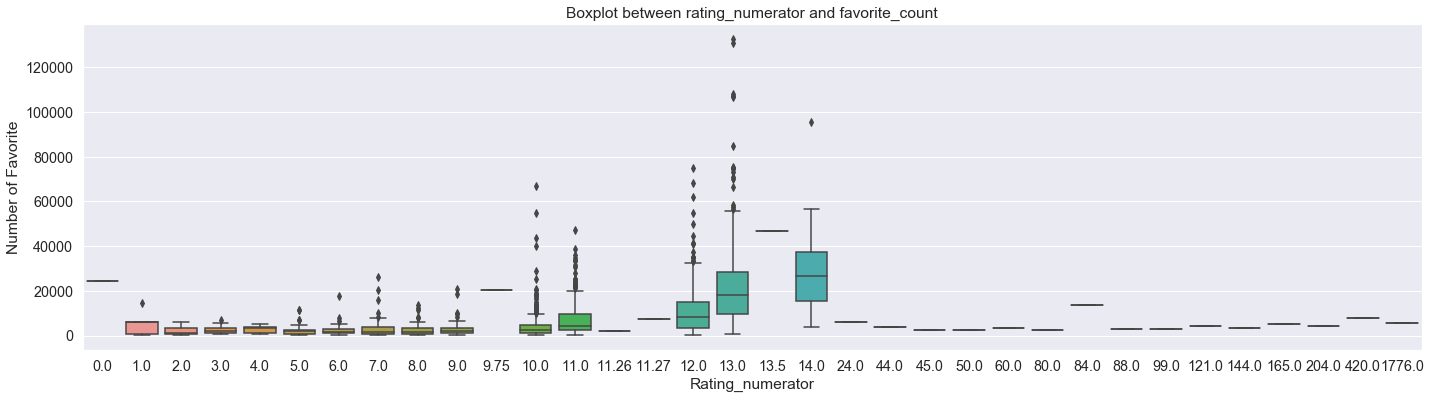

In [91]:
# Font & Graph options
sns.set(font_scale=1.3)
plt.subplots(figsize=(24, 6))

# boxplot 
sns.boxplot(x=df_total['rating_numerator'], y=df_total['favorite_count']).set(xlabel='Rating_numerator',
                                                                              ylabel='Number of Favorite',
                                                                              title='Boxplot between rating_numerator and favorite_count')

Insight
- Supposing rating_numerator values of 24~1776 are outliers, our data show that <strong>Highly</strong> rated tweets are more likely to receive 'Favorite' from the users

### Boxplot between 'rating_numerator' and 'retweet_count'

[Text(0, 0.5, 'Number of Retweet'),
 Text(0.5, 0, 'Rating_numerator'),
 Text(0.5, 1.0, 'Boxplot between rating_numerator and retweet_count')]

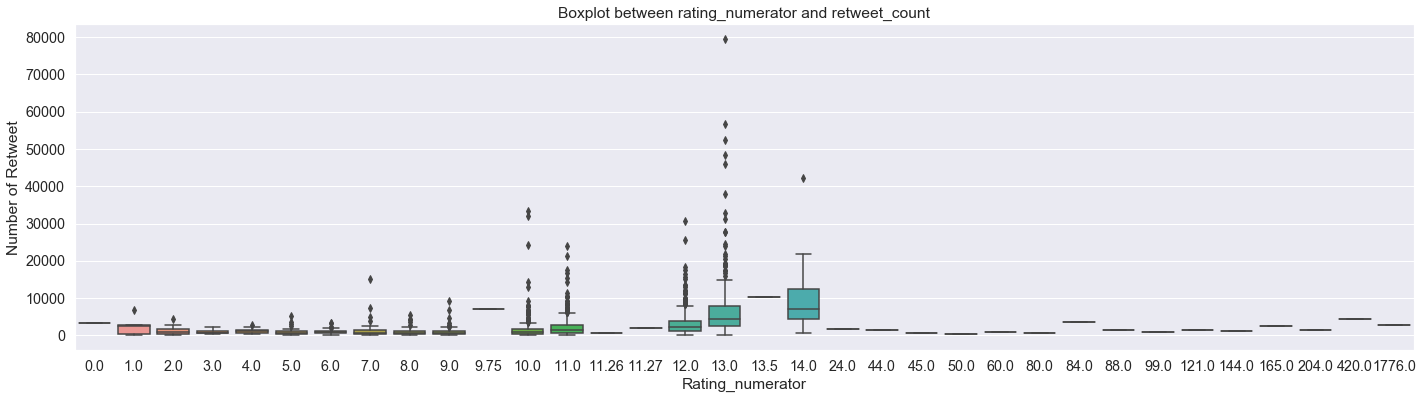

In [92]:
# Font & Graph options
plt.subplots(figsize=(24, 6))

# boxplot 
sns.boxplot(x=df_total['rating_numerator'], y=df_total['retweet_count']).set(xlabel='Rating_numerator',
                                                                              ylabel='Number of Retweet',
                                                                              title='Boxplot between rating_numerator and retweet_count')

Insight
- Similar to Boxplot between 'rating_numerator' and 'favorite_count', Number of retweet tends to increase as the rating increases

### Scatterplot between 'favorite_count'' and 'retweet_count'

Correlation Factor:  0.9112013037010287


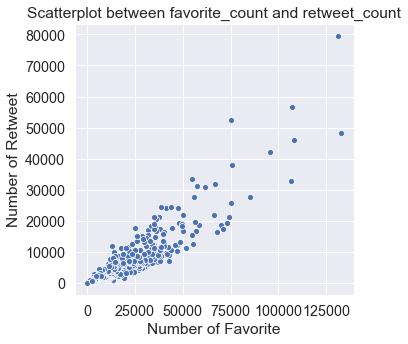

In [93]:
plt.subplots(figsize=(5, 5))
sns.scatterplot(x=df_total['favorite_count'], y=df_total['retweet_count']).set(xlabel='Number of Favorite',
                                                                              ylabel='Number of Retweet',
                                                                              title='Scatterplot between favorite_count and retweet_count')
print('Correlation Factor: ', np.corrcoef(list(df_total['favorite_count']), list(df_total['retweet_count']))[0,1])

Insights
- According to the graph and correlation factor of (0.91), which is very high, number of favorite count and retweet have Very High correlation

### Lineplot between 'stage'' and 'favorite_count'

[Text(0, 0.5, 'Number of favorite'),
 Text(0.5, 0, 'Stage'),
 Text(0.5, 1.0, 'Lineplot between stage and favorite_count')]

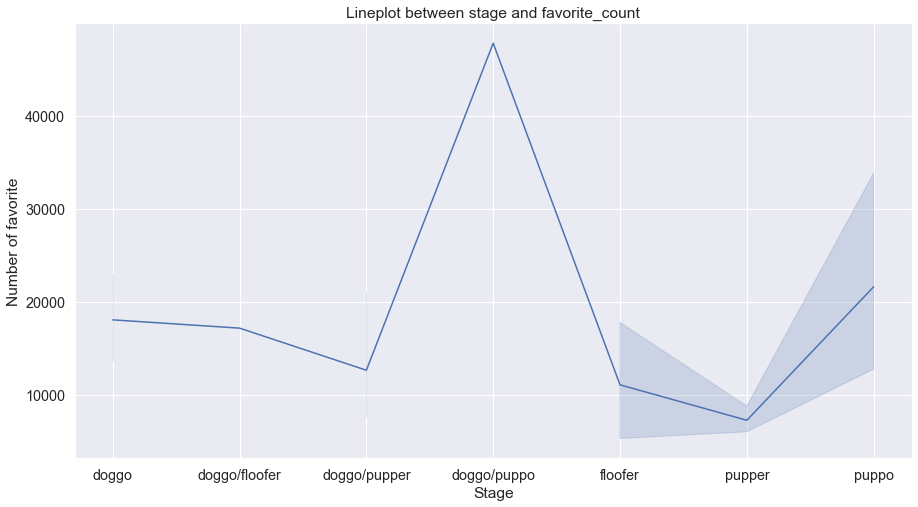

In [94]:
plt.subplots(figsize=(15, 8))
sns.lineplot(data=df_total, x='stage', y='favorite_count').set(xlabel='Stage',
                                                               ylabel='Number of favorite',
                                                               title='Lineplot between stage and favorite_count')

Insight
- it seems people tend to like dogs in 'doggo/puppo' stages! (stage between doggo and pupper)
- People like dogs that are Not too old and young and Not too big and small

### Top 10 Names

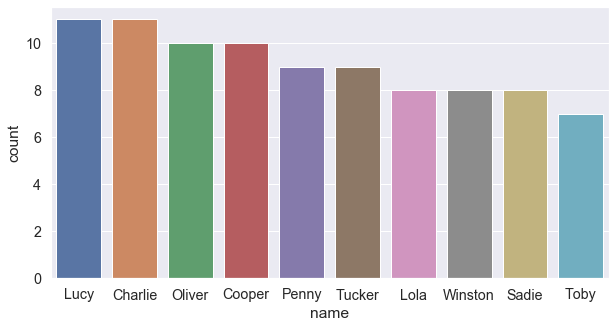

In [95]:
plt.subplots(figsize=(10, 5))
# Display the Top 10 names by using 'ordre' parameter
sns.countplot(data=df_total, x='name', order=df_total['name'].value_counts().index[1:11])

Insights
- It can be found that the Top 10 popular names are as follows: 'Lucy', 'Charlie', 'Cooper', 'Oliver', 'Tucker', 'Penny', 'Winston','Sadie', 'Lola', 'Toby'] 

### Countplot of Timeline(hour)

In [96]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   text                2097 non-null   object        
 3   rating_numerator    2097 non-null   float64       
 4   rating_denominator  2096 non-null   Int64         
 5   name                1494 non-null   object        
 6   stage               336 non-null    object        
 7   retweet_count       2097 non-null   Int64         
 8   favorite_count      2097 non-null   Int64         
 9   img_num             1971 non-null   Int64         
 10  p1                  1971 non-null   object        
 11  p1_conf             1971 non-null   float64       
dtypes: Int64(4), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 301.2+ KB


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Hour'),
 Text(0.5, 1.0, 'Countplot of Hour')]

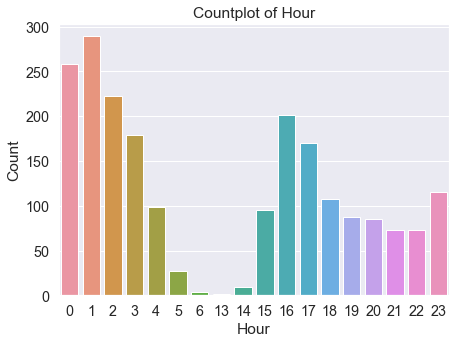

In [97]:
plt.subplots(figsize=(7, 5))
sns.countplot(data=df_total, x=df_total['timestamp'].dt.hour).set(xlabel='Hour',
                                                                  ylabel='Count',
                                                                  title='Countplot of Hour')

Insight
- it seems like WeRateDogs Account owner is very active during (00:00~02:00) period and likes to take a rest of focus on his job during (07:00 ~ 13:00) period

## Exporting "twitter_archive_master.csv"

In [98]:
df_total.to_csv('twitter_archive_master.csv', index=False)